## HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1. Linear regression model

## Load regression data

In [ ]:
# x_train, x_test, y_train, y_test = np.load('/content/drive/MyDrive/regression_data.npy', allow_pickle=True)
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

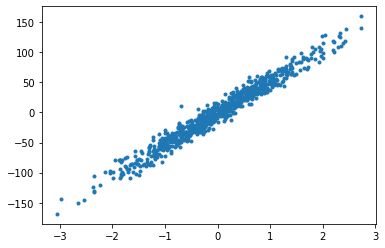

In [ ]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [ ]:
# x_train_ = x_train.copy()
# y_train_ = y_train.copy()



# iteration = 1000
# mean = 0 
# sigma = 0.1 
# learning_rate = 0.003
# batch_size = 1

# training_loss = []
# training_round = []

# def compute_loss_SGD(w):
#   total_loss = 0.0
#   for i in range(len(x_train)):
#     total_loss += (x_train[i][0] * w[1] + w[0] - y_train[i]) * (x_train[i][0] * w[1] + w[0] - y_train[i]) * 0.5
#   return total_loss/750

# w = np.random.normal(mean, sigma, 2)

# for i in range(iteration):
#   a_batch = min(batch_size , len(x_train_))
#   final_batch = 0

#   if a_batch == len(x_train_):
#     final_batch = 1 

#   x_batch = x_train_[:a_batch]
#   y_batch = y_train_[:a_batch]

#   training_loss.append(compute_loss_SGD(w))
#   training_round.append(i)

#   grads = np.array([0.0 , 0.0])

#   for j in range(a_batch):
#     grads[0] += (w[1] * x_batch[j][0] + w[0] - y_batch[j])
#     grads[1] += (w[1] * x_batch[j][0] + w[0] - y_batch[j])*(x_batch[j][0])
#   for idx , grad in enumerate(grads):
#     grads[idx] = 2/a_batch * grad
#   for idx , widx in enumerate(w):
#     w[idx] = widx - learning_rate * grads[idx]

#   if final_batch : 
#     x_train_ = x_train.copy()
#     y_train_ = y_train.copy()
#     continue

#   x_train_ = x_train_[a_batch:]
#   y_train_ = y_train_[a_batch:]

# plt.figure(figsize=(10,6))
# plt.xlabel("iterations")
# plt.ylabel("training loss")
# plt.plot(training_round , training_loss)
# plt.show()

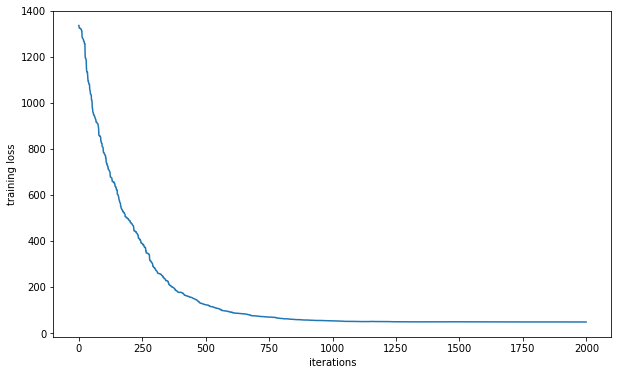

In [ ]:
x_train_ = x_train.copy()
y_train_ = y_train.copy()

append_feature = [[]]
for i in range(len(x_train_)):
  append_feature[0].append(1)

append_feature = np.array(append_feature)
aa = append_feature.T
x_train_ = np.concatenate((x_train_, aa), axis=1)

iteration = 2000
mean = 0 
sigma = 0.1 
learning_rate = 0.003
batch_size = 1

training_loss = []
training_round = []

def compute_loss_SGD(w , b):
  total_loss = 0.0
  for i in range(len(x_train)):
    total_loss += (x_train[i][0] * w + b - y_train[i]) * (x_train[i][0] * w + b - y_train[i]) * 0.5
  return total_loss/750

w , b = np.random.normal(mean, sigma, 2)

for i in range(iteration):
  a_batch = min(batch_size , len(x_train_))
  final_batch = 0

  if a_batch == len(x_train_):
    final_batch = 1 

  x_batch = x_train_[:a_batch]
  y_batch = y_train_[:a_batch]

  training_loss.append(compute_loss_SGD(w , b))
  training_round.append(i)

  grads = np.zeros((2,1))
  preds = np.zeros((len(x_batch) , 1))
  labels = np.zeros((len(x_batch) , 1))
  
  for j in range(a_batch):
    pred = w * x_batch[j][0] + b
    preds[j][0] = pred
    labels[j][0] = y_batch[j]
  # print(grads)
  # print(np.dot(x_batch.T , np.subtract(preds , labels)))
  grads += np.dot(x_batch.T , np.subtract(preds , labels))
  # print(grads)
  grads /= a_batch*1.0
  # print(grads)
  w -= learning_rate*grads[0][0]
  b -= learning_rate*grads[1][0]

  if final_batch : 
    x_train_ = x_train.copy()
    x_train_ = np.concatenate((x_train_, aa), axis=1)
    y_train_ = y_train.copy()
    continue

  x_train_ = x_train_[a_batch:]
  y_train_ = y_train_[a_batch:]

plt.figure(figsize=(10,6))
plt.xlabel("iterations")
plt.ylabel("training loss")
plt.plot(training_round , training_loss)
plt.show()

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

In [ ]:
print(w , "* x +" , b)
preds = []
for i in range(len(x_test)):
  pred = x_test[i][0] * w + b
  preds.append(pred)
preds = np.array(preds , ndmin = 1)
ground_truth = np.array(y_test)
MSE = np.square(np.subtract(preds , ground_truth)).mean()
print("MSE: " , MSE)

# plt.figure(figsize=(10,6))
# plt.xlabel("x-value")
# plt.ylabel("y-value")
# plt.scatter(x_train , y_train , color = "blue" , s = 5)
# plt.scatter(x_test , y_test , color = "red" , s = 5)
# plt.plot(x_test , preds , color = "green" , linewidth = 2) 
# plt.show()

52.76404753834208 * x + -0.533990854288034
MSE:  110.4548454064262


# Part 2. Logistic regreesion model

## Load classification data

In [ ]:
# x_train, x_test, y_train, y_test = np.load('/content/drive/MyDrive/classification_data.npy', allow_pickle=True)
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

(750, 1)

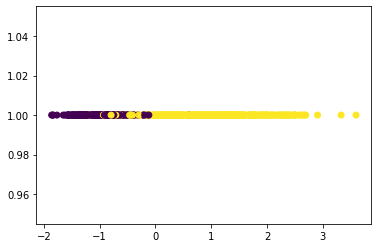

In [ ]:
plt.scatter(x_train, np.ones_like(x_train), c= y_train)

In [ ]:
# x_train_ = x_train.copy()
# y_train_ = y_train.copy()

# def sigmoid(a):
#   return 1/(1+np.exp(-a))*1.0

# def phi(a):
#   return a*1.0

# iteration = 1000
# mean = 0 
# sigma = 0.1 
# learning_rate = 0.5
# batch_size = 10

# training_loss = []
# training_round = []

# def compute_loss_sigmoid(w , b):
#   total_loss = 0.0 
#   for i in range(len(x_train)):
#     total_loss += -1.0*y_train[i] * np.log(sigmoid(w * phi(x_train[i][0]) + b)) - \
#             (1 - y_train[i]) * np.log(1 - sigmoid(w * phi(x_train[i][0]) + b))
#   return total_loss 


# w , b = np.random.normal(mean, sigma, 2)

# for i in range(iteration):
#   a_batch = min(batch_size , len(x_train_))
#   final_batch = 0

#   if a_batch == len(x_train_):
#     final_batch = 1 

#   x_batch = x_train_[:a_batch]
#   y_batch = y_train_[:a_batch]

#   training_loss.append(compute_loss_sigmoid(w , b))
#   training_round.append(i)

#   w_grads = 0.0
#   b_grads = 0.0

#   for j in range(a_batch):
#     w_grads += (sigmoid(w * phi(x_batch[j][0]) + b) - y_batch[j])*phi(x_batch[j][0])
#     b_grads += (sigmoid(w * phi(x_batch[j][0]) + b) - y_batch[j])
  
#   w -= learning_rate * (w_grads/a_batch*1.0)
#   b -= learning_rate * (b_grads/a_batch*1.0)

#   if final_batch :
#      x_train_ = x_train.copy()
#      y_train_ = y_train.copy()
#      continue

#   x_train_ = x_train_[a_batch:]
#   y_train_ = y_train_[a_batch:]

# plt.figure(figsize=(10,6))
# plt.xlabel("iterations")
# plt.ylabel("training loss")
# plt.plot(training_round , training_loss)
# plt.show()

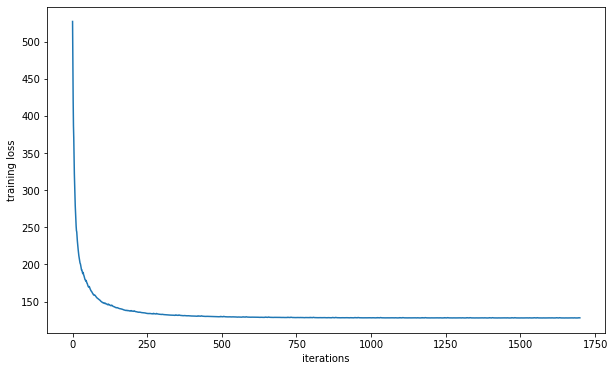

In [ ]:
x_train_ = x_train.copy()
y_train_ = y_train.copy()

append_feature = [[]]
for i in range(len(x_train_)):
  append_feature[0].append(1)

append_feature = np.array(append_feature)
aa = append_feature.T
x_train_ = np.concatenate((x_train_, aa), axis=1)
# print(x_train_)
def sigmoid(a):
  if a >= 0 : 
    return 1/(1+np.exp(-a))*1.0
  else :
    return 1.0*np.exp(a)/(1+np.exp(a))

def phi(a):
  return a*1.0

iteration = 1700
mean = 0 
sigma = 0.1 
learning_rate = 0.3
batch_size = 10

training_loss = []
training_round = []

def compute_loss_sigmoid(w , b):
  total_loss = 0.0 
  for i in range(len(x_train)):
    total_loss += -1.0*y_train[i] * np.log(sigmoid(w * phi(x_train[i][0]) + b)) - (1 - y_train[i]) * np.log(1 - sigmoid(w * phi(x_train[i][0]) + b))
  return total_loss 


w , b = np.random.normal(mean, sigma, 2)


for i in range(iteration):
  a_batch = min(batch_size , len(x_train_))
  final_batch = 0

  if a_batch == len(x_train_):
    final_batch = 1 

  x_batch = x_train_[:a_batch]
  y_batch = y_train_[:a_batch]

  training_loss.append(compute_loss_sigmoid(w , b))
  training_round.append(i)

  grads = np.zeros((2,1))
  preds = np.zeros((len(x_batch) , 1))
  labels = np.zeros((len(x_batch) , 1))
  
  for j in range(a_batch):
    pred = sigmoid((w * phi(x_batch[j][0]) + b))
    preds[j][0] = pred
    labels[j][0] = y_batch[j]
  # print(grads)
  # print(np.dot(x_batch.T , np.subtract(preds , labels)))
  grads += np.dot(x_batch.T , np.subtract(preds , labels))
  # print(grads)
  grads /= a_batch*1.0
  # print(grads)
  w -= learning_rate*grads[0][0]
  b -= learning_rate*grads[1][0]

  if final_batch : 
    x_train_ = x_train.copy()
    x_train_ = np.concatenate((x_train_, aa), axis=1)
    y_train_ = y_train.copy()
    continue

  x_train_ = x_train_[a_batch:]
  y_train_ = y_train_[a_batch:]

plt.figure(figsize=(10,6))
plt.xlabel("iterations")
plt.ylabel("training loss")
plt.plot(training_round , training_loss)
plt.show()

4.776041298265617 * x + 1.7238598687659066
Cross Entrophy:  47.38970895952915


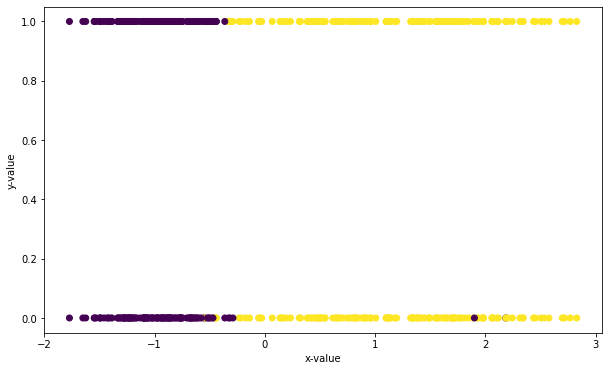

In [ ]:
print(w , "* x +" , b)
preds = []
total_loss = 0.0 
for i in range(len(x_test)):
  pred = (sigmoid(x_test[i][0] * w + b) > 0.5)
  preds.append(pred)
  total_loss += -1.0*y_test[i] * np.log(sigmoid(w * phi(x_test[i][0]) + b)) - \
            (1 - y_test[i]) * np.log(1 - sigmoid(w * phi(x_test[i][0]) + b))

preds = np.array(preds , ndmin = 1)
print("Cross Entrophy: " , total_loss)

plt.figure(figsize=(10,6))
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.scatter(x_test , np.ones_like(preds) , c = preds) 
plt.scatter(x_test , np.zeros_like(y_test) , c = y_test) 
plt.show()